# here, the dependent variable is **"Absenteeism time in hours"**

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
sns.set(style='darkgrid') # plots ke background ko colour dene ke liye kiya hai.

df=pd.read_csv("/content/drive/MyDrive/Datasets-main/Absenteeism_at_work.csv",sep=";")
# phle kuchh sample print krke dekhna hoga ki hamara dataset proper table format mein ha ya nahi.
# agar nahi hai to kis particular symbol se separated hai. us symbol ko "sep='..'" mein define karenge.

df.sample(50).style.background_gradient(cmap="Greens")
# style vala scene bilkul optional hai. bas hoga itna ki hamara dataset colourful dekhega vo bhi kisi colour-pattern mein.

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
77,11,26,10,4,4,289,36,13,33,253.465000,93,0,1,2,1,0,1,90,172,30,8
499,15,28,9,5,1,291,31,12,40,261.756000,87,0,1,1,1,0,1,73,171,25,2
236,14,19,7,3,1,155,12,14,34,275.312000,98,0,1,2,1,0,0,95,196,25,16
150,28,25,2,5,2,225,26,9,28,302.585000,99,0,1,1,0,0,2,69,169,24,3
78,10,23,10,6,4,361,52,3,28,253.465000,93,0,1,1,1,0,4,80,172,27,1
719,22,13,6,2,1,179,26,9,30,275.089000,96,0,3,0,0,0,0,56,171,19,3
587,33,1,2,4,2,248,25,14,47,264.249000,97,0,1,2,0,0,1,86,165,32,8
102,28,23,12,5,4,225,26,9,28,261.306000,97,0,1,1,0,0,2,69,169,24,2
709,34,10,6,4,3,118,10,10,37,275.089000,96,0,1,0,0,0,0,83,172,28,8
354,20,26,12,4,2,260,50,11,36,236.629000,93,0,1,4,1,0,0,65,168,23,8


In [3]:
df.shape

(740, 21)

In [4]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [5]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
df.drop('ID', axis=1,) # inplace=True --> iska matlab hai hum apne dataset ko bina uski copy banaye usmein modifications kr rhey hain.

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


In [8]:
df.shape

(740, 21)

In [9]:
df.describe(include='all').style.background_gradient(cmap="Oranges") # statistical values of columns

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [10]:
df['Month of absence'].value_counts()
# isse pata chalta hai ki "March" month mein sbse jada leaves hain.
# ab ismein dekho 0 hai iska matlab ye hidden missing value hai kyonki month kabhi bhi 0 nahi ho skta hai.

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

In [11]:
# kyonki month to categorical data mein aata hai to ise ab hum "mode" se replace karenge.
df["Month of absence"].replace(0,3,inplace=True) # jahan jahan 0 hoga uski jagah 3 aa jayega.

In [12]:
df['Month of absence'].value_counts()

3     90
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
Name: Month of absence, dtype: int64

In [13]:
# to dekho pure dataset mein se 0 remove ho gaya aur 3 ki sankhya 87 se increase hoker 90 ho gayi hai

In [14]:
df.skew()
# iska matlab distplot mein graph kis side jada jhuka hua hai
# agar left side jada hai to (+ve) skewed
# agar right side jada hai to (-ve) skewed
# agar center jada hai to bilkul normal hai (no skewness) i.e., skew value is very close to 0.

# below table se "Hit target" is highly (-ve) skewed, "Absenteeism time in hours" is highly (+ve) skewed and "Weight" is normal (no skewness).

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.081737
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

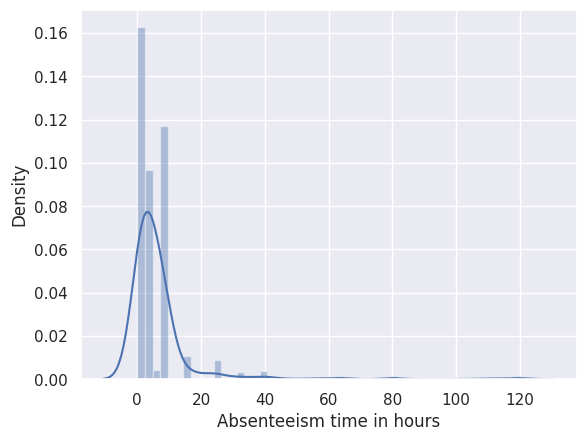

In [15]:
sns.distplot(df["Absenteeism time in hours"])
plt.show()

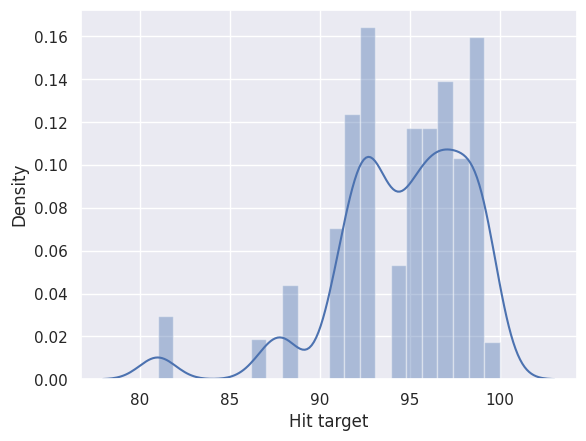

In [16]:
sns.distplot(df["Hit target"])
plt.show()

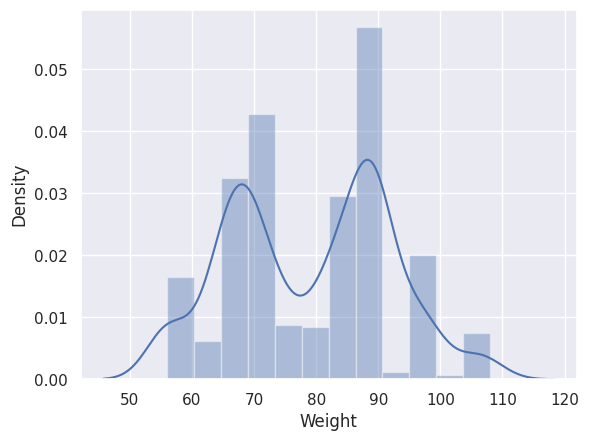

In [17]:
sns.distplot(df["Weight"])
plt.show()

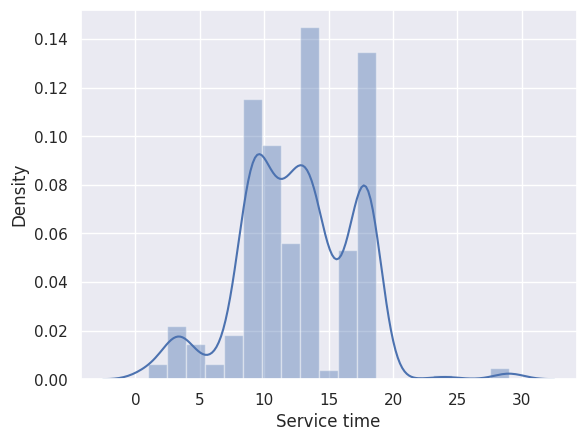

In [18]:
sns.distplot(df["Service time"])
plt.show()

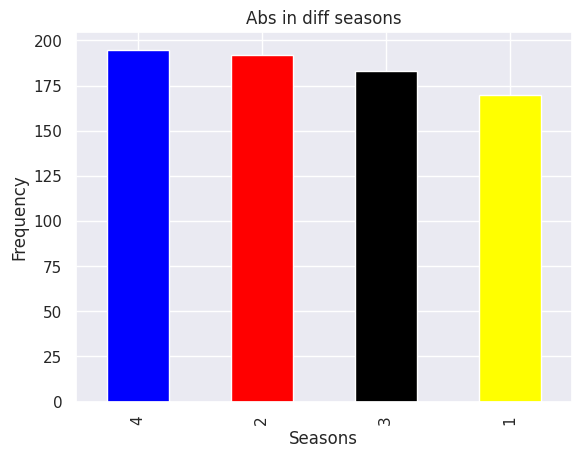

In [19]:
bar_colors=['blue', 'red','black','yellow']
df["Seasons"].value_counts().plot(kind='bar',color=bar_colors)
plt.title('Abs in diff seasons')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.show()

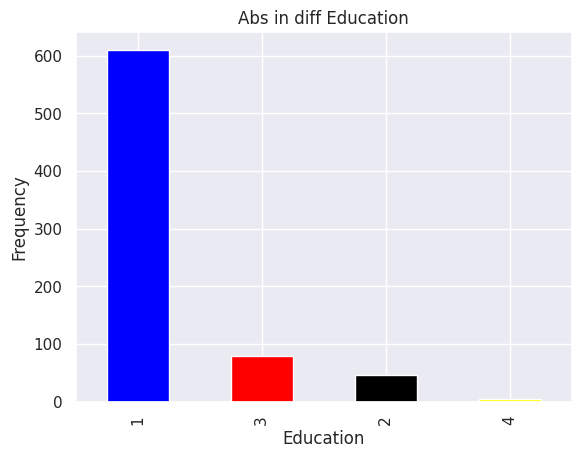

In [20]:
bar_colors=['blue', 'red','black','yellow']
df["Education"].value_counts().plot(kind='bar',color=bar_colors)
plt.title('Abs in diff Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

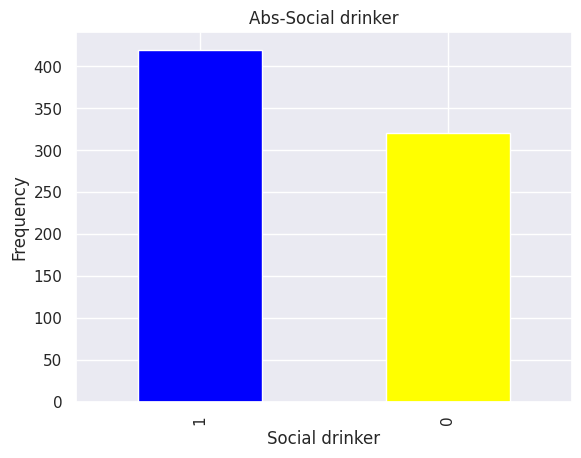

In [21]:
bar_colors=['blue','yellow']
df["Social drinker"].value_counts().plot(kind='bar',color=bar_colors)
plt.title('Abs-Social drinker')
plt.xlabel('Social drinker')
plt.ylabel('Frequency')
plt.show()

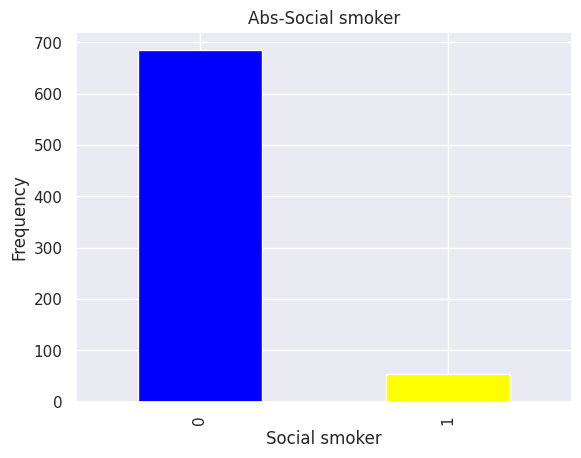

In [22]:
bar_colors=['blue','yellow']
df["Social smoker"].value_counts().plot(kind='bar',color=bar_colors)
plt.title('Abs-Social smoker')
plt.xlabel('Social smoker')
plt.ylabel('Frequency')
plt.show()

In [23]:
corr=df.corr()
corr
# it is difficult to study the co-relation between columns of the dataset

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000803,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.092395,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000803,-0.092395,1.000000,-0.005512,0.408072,0.135803,-0.003498,-0.062274,0.002624,-0.170867,-0.462376,0.107637,-0.068004,0.080448,0.057220,-0.039795,0.055919,0.026887,-0.069553,0.055173,0.022617
Day of the week,0.034468,0.116319,-0.005512,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.408072,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.135803,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003498,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062274,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,0.002624,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.170867,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


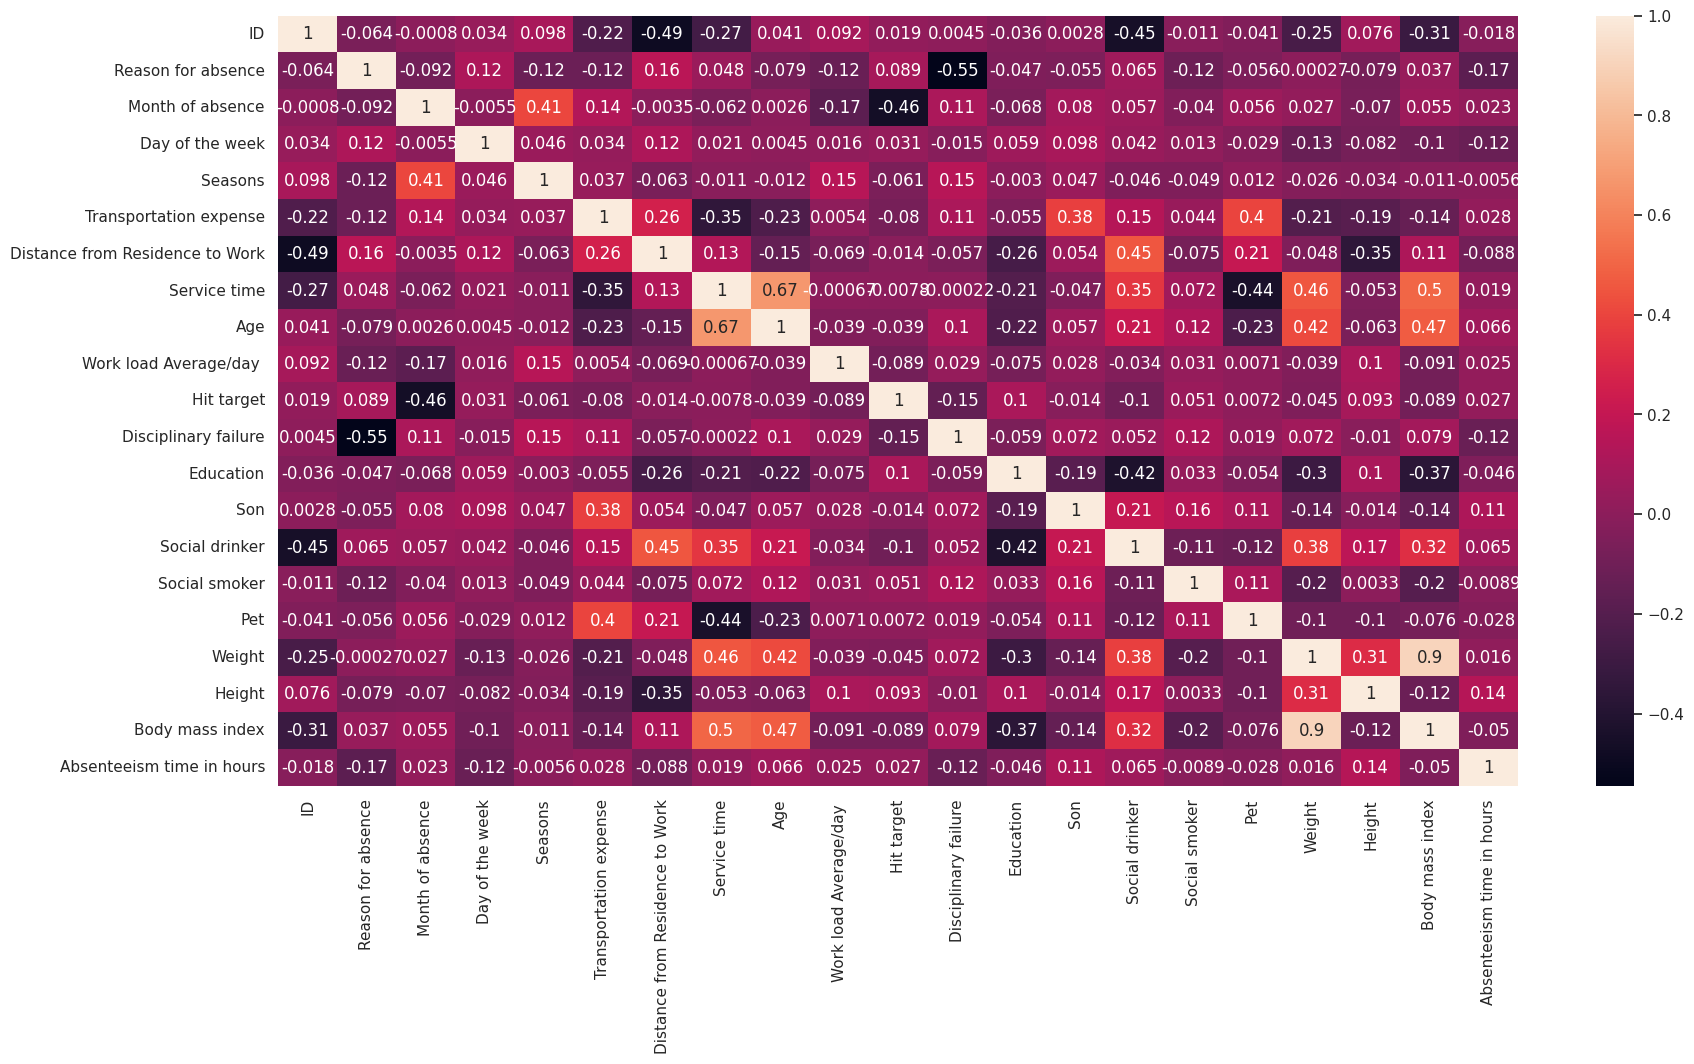

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

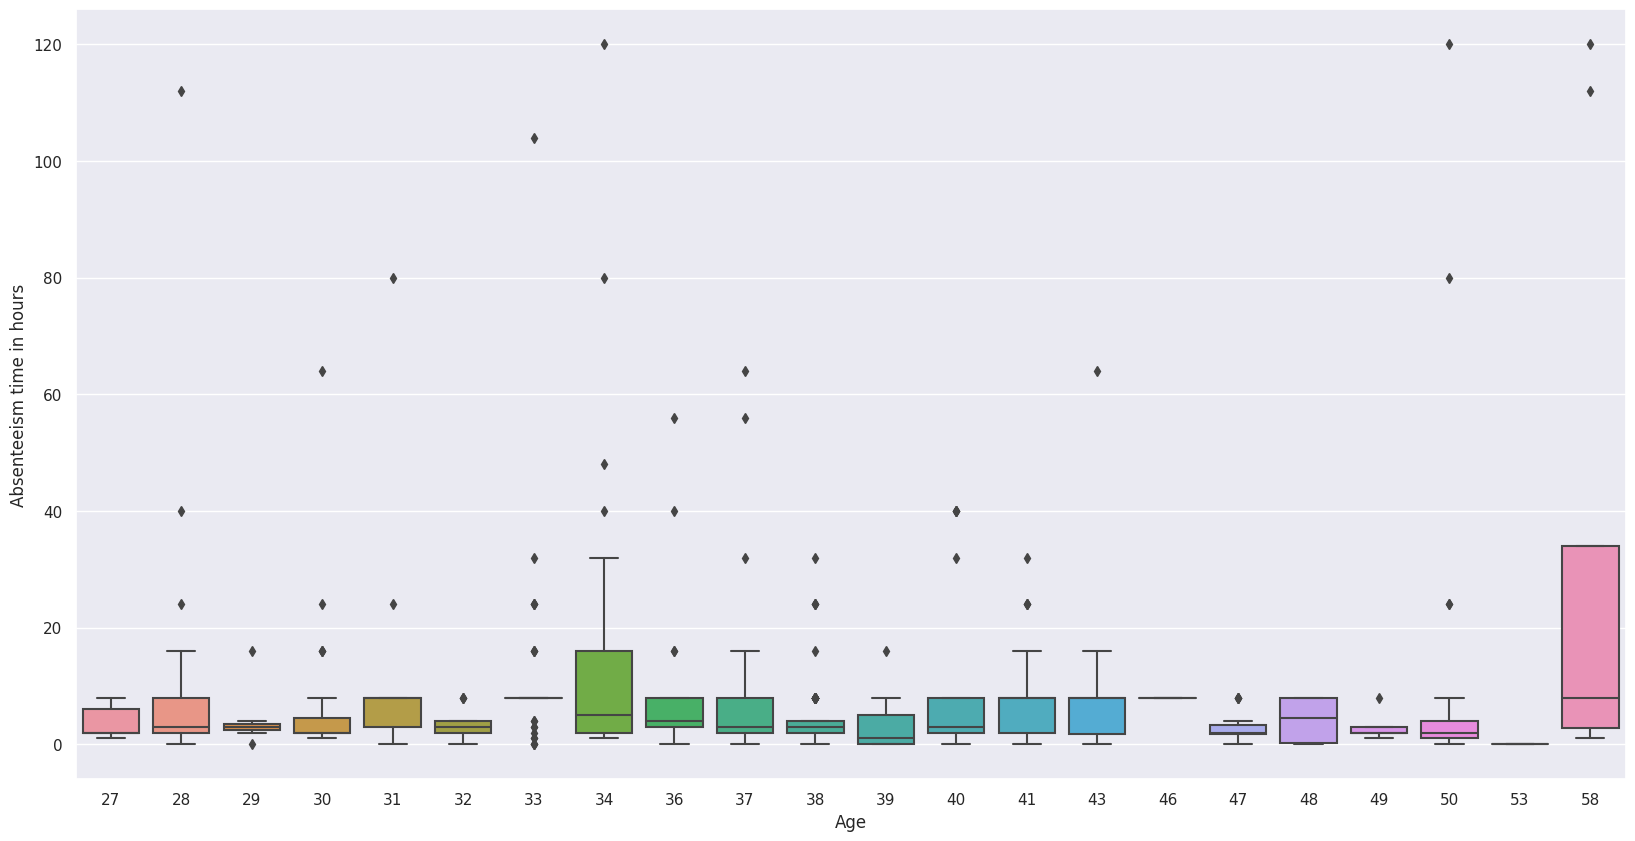

In [25]:
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(x='Age', y='Absenteeism time in hours',data=df)
plt.show()

In [26]:
# isse pata chal rha hai ki age = 29 ki absent bahut kam aur age = 58 ki absent sabse jada hain

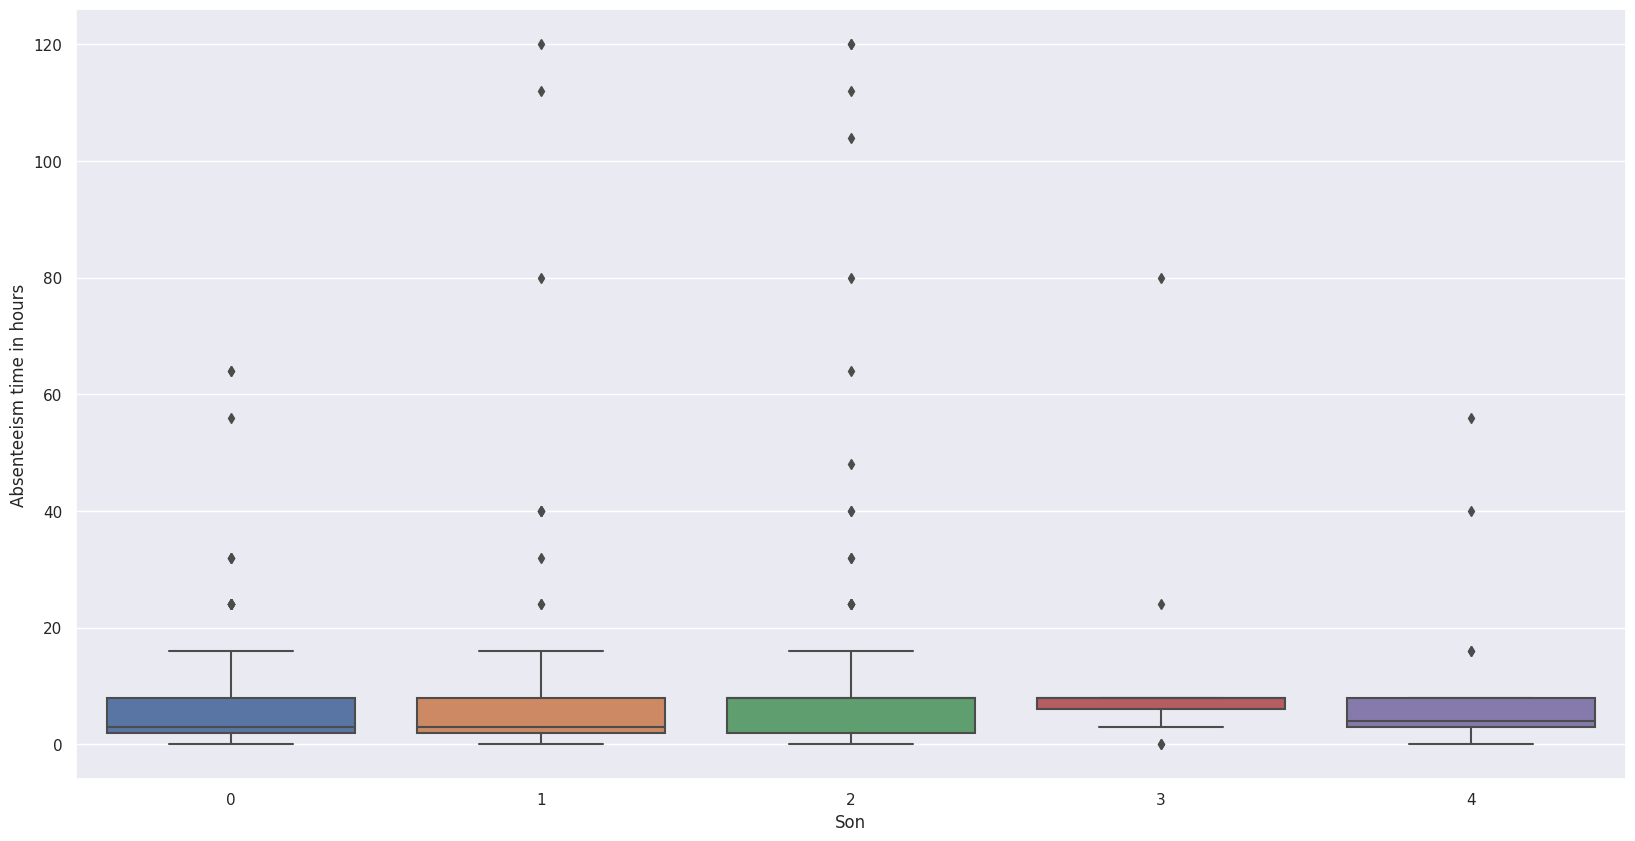

In [27]:
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(x='Son', y='Absenteeism time in hours',data=df)
plt.show()

### build ***linear regression model*** for 'Absenteeism time in hours'

In [28]:
y=df[['Absenteeism time in hours']]
x=df.drop(['Absenteeism time in hours'],axis=1)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [30]:
model_lr=LinearRegression()

In [31]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [32]:
model_lr.score(x_train,y_train)

0.1707119740089682

In [33]:
model_lr.score(x_test,y_test)

0.0925550989261561

In [34]:
# linear regression se model ka score to bahut kharab aa rha hai

### build ***polynomial regrssion model*** for 'Absenteeism time in hours'

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

# in sample training R^2 will always improve with the number of variables

print(poly_clf.score(x_train2, y_train))

0.4384451716543377


In [36]:
print(poly_clf.score(x_test2,y_test))

-38.75838006329024


In [37]:
# polynomial regression se bhi score is getting more worse.

### build ***SVR (support vector regressor) model*** for 'Absenteeism time in hours'

In [38]:
from sklearn.svm import SVR

In [39]:
model_svr=SVR(kernel='poly') # kernel values = linear, poly, rbf, sigmoid, precomputed --> bydefault = 'rbf'

In [40]:
model_svr.fit(x_train,y_train)

SVR(kernel='poly')

In [41]:
model_svr.score(x_train,y_train)

-0.05225722730950677

In [42]:
model_svr.score(x_test,y_test)

-0.059594366130874654

In [43]:
# SVR model se score aur bhi bekaar ho gaya.
# --------------------------------------------------------------------------------------------------------------------------------
# ab kyonki uper ke tino models se hamare model ka score bekar hota dikh rha hai to ab hum kuchh data preprocessing techniques
# ko use karenge taki model ke score mein kuchh difference dekhne kop mile

### ***preprocessing techniques***


In [44]:
from scipy.stats import zscore

In [45]:
x_scaled=x.apply(zscore)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

* ***Linear Regression***

In [46]:
model_lr2=LinearRegression()

In [47]:
model_lr2.fit(x_train,y_train)

LinearRegression()

In [48]:
model_lr2.score(x_train,y_train)

0.1707119740089682

In [49]:
model_lr2.score(x_test,y_test)

0.09255509892615665

In [50]:
# ismein to values same hi aayi hain

* ***SVR***

In [51]:
model_svr2=SVR(kernel='linear') # kernel values = linear, poly, rbf, sigmoid, precomputed --> bydefault = 'rbf'

In [52]:
model_svr2.fit(x_train,y_train)

SVR(kernel='linear')

In [53]:
model_svr2.score(x_train,y_train)

0.04603747687559745

In [54]:
model_svr2.score(x_test,y_test)

0.06254830529674082

In [55]:
# ismein phle to (-ve) score aaya tha lekin ab (+ve) mein score aaya hai.

# to dekha, humne kitne hi ML models use krke dekhe lekin humein model ka score achha nahi mila.
### to ab is situation mein humkya karein vo concept agle session mein pata chalega.